# **IPL Team performance Evaluation (Mumbai Indians)**

# 1.1 Importing Libraries

In [3]:
# Install category_encoders if not already installed
%pip install category_encoders
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


#1.2 Loding The Data Sets

In [1]:
# Load the datasets
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [9]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [37]:
!git clone https://github.com/jalilrohi1/IplWinPredict.git


fatal: destination path 'IplWinPredict' already exists and is not an empty directory.


In [25]:
#%cd IplWinPredict

[Errno 2] No such file or directory: 'IplWinPredict'
/content/IplWinPredict


In [49]:
#path_matchDataSet ='/content/drive/MyDrive/Colab Notebooks/iplDataSet/matches.csv'
#path_deliveryDataSet='/content/drive/MyDrive/Colab Notebooks/iplDataSet/deliveries.csv'
path_matchDataSet = 'data/matches.csv'
path_deliveryDataSet='data/deliveries.csv';
ipl_matches = pd.read_csv(path_matchDataSet)
ipl_delivery =pd.read_csv(path_deliveryDataSet)

In [ ]:
#to Save Data Back in the Drive
ipl_matches.to_csv(path_matchDataSet, index=False)
ipl_delivery.to_csv(path_deliveryDataSet, index=False)

#**2 Exploring and Analyzing the DataSet**

In [39]:
# Display the first few rows of each dataset to understand their structure
ipl_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


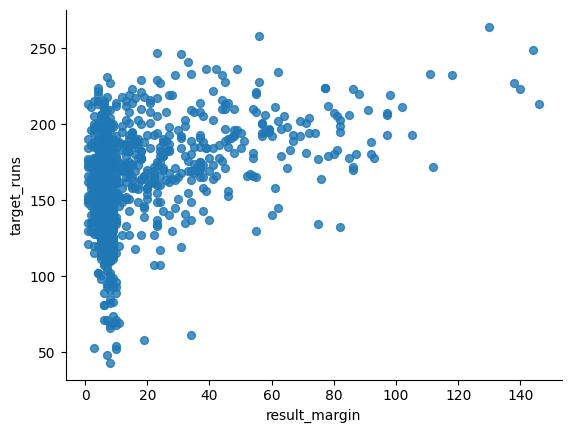

In [ ]:
# @title result_margin vs target_runs

from matplotlib import pyplot as plt
ipl_matches.plot(kind='scatter', x='result_margin', y='target_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ipl_delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
ipl_matches.shape

(1024, 20)

In [ ]:
ipl_delivery.shape

(30525, 17)

In [40]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             973 non-null    object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

**Things observed from Match info.**

**Date column** - wrong Datatype. it should be Datetime but it is object

**Season Column** - Wrong Datatype and error in values. it should be int / categorical but it is object.

Additional points that can be done on the dataframe
The Following columns are in object format but it can be converted to Categorical.

**1.City 2.Season 3.Team1 4.Team2 5.Toss_Winner 6Toss_Decision 7.Winner 8.Result 9.Venue**

In [ ]:
ipl_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          243817 non-null  int64 
 1   inning            243817 non-null  int64 
 2   batting_team      243817 non-null  object
 3   bowling_team      243817 non-null  object
 4   over              243817 non-null  int64 
 5   ball              243817 non-null  int64 
 6   batter            243817 non-null  object
 7   bowler            243817 non-null  object
 8   non_striker       243817 non-null  object
 9   batsman_runs      243817 non-null  int64 
 10  extra_runs        243817 non-null  int64 
 11  total_runs        243817 non-null  int64 
 12  extras_type       13059 non-null   object
 13  is_wicket         243817 non-null  int64 
 14  player_dismissed  12067 non-null   object
 15  dismissal_kind    12067 non-null   object
 16  fielder           8663 non-null    obj


**Things observed from the deliveries.**
All the columns appear to be in correct Datatype format.
Additional Things that can be done on dataframe Following is the list of column in int64 / object. we can convert them into Categorical columns

**1.Innings 2.Over 3.Ball 4.batsman_runs 5.Extras_type 6.is_wicket 7.dismissal_kind**


#**2.1 Data Cleaning**



#**2.1.1 Checking for null values**


**2.1.1.1 Handling Missing Values (Match Dataset)**

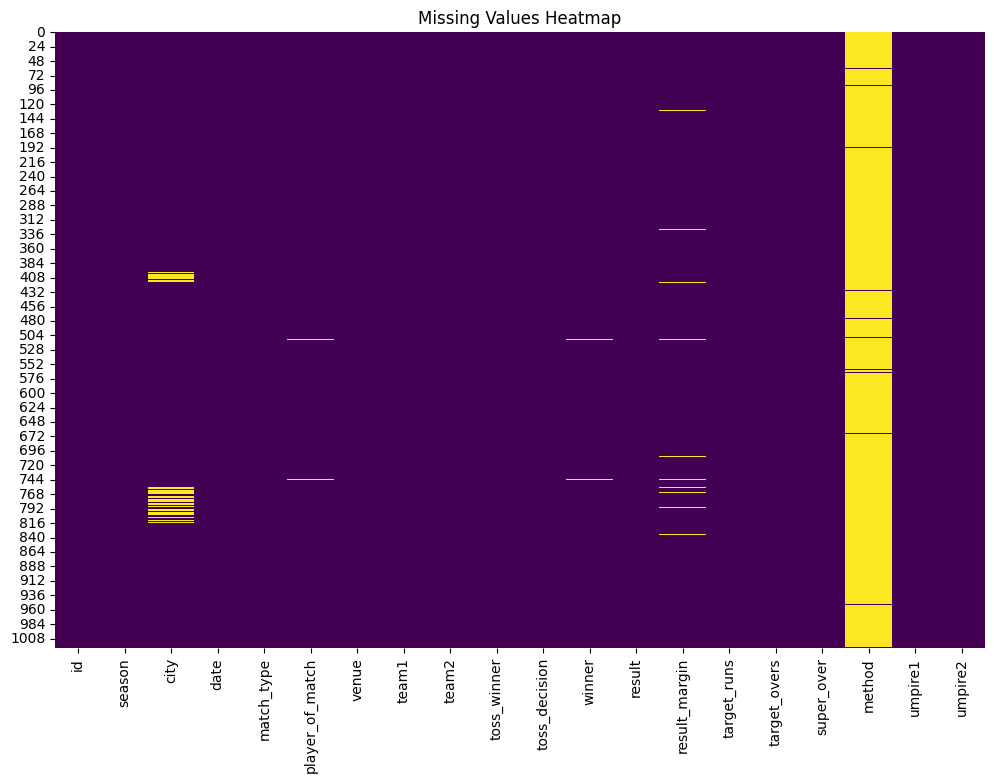

In [41]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_matches.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
ipl_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1003
umpire1               0
umpire2               0
dtype: int64

**city:** This column has **51** missing values. We can fill these missing values with 'Unknown' but I decided to analyze the data in excel aftwer looking at data I found That The city where we have nan values, then staiums are Dubai International Cricket Stadium - Dubai
Sharjah Cricket Stadium - Sharjahso we will fill it whit respect to the **venue.**

**player_of_match**, **winner:** These columns have **5** missing values each. These can be left as is or filled with 'Unknown' for simplicity, but after analysis the data I found that if there is no winner then the match doesn't played between the teams and no player of the match exits, so **I decided to delete these five rows.**

**result_margin:** This column has **19** missing values. Since result margin is important, after analysis I found that the match has **Tied** between the teams, **So we can fill missing values with 0.**

**target_runs**, **target_overs:** These columns have **3** missing values each. It might be due to incomplete matches or no results. **Fill these with 0.** but when** I delete the Plyer of the match the it will be deleted because these** are related with them

**method:** This column has **1003** missing values. Since this is not relevant for most analyses, **we can drop this column.**

In [51]:
#Replacing the City with respect to the Venue
for index, row in ipl_matches.iterrows():
  if row['venue'] == 'Dubai International Cricket Stadium':
    ipl_matches.at[index, 'city'] = 'Dubai'
  elif row['venue'] == 'Sharjah Cricket Stadium':
    ipl_matches.at[index,'city'] = 'Sharjah'

In [52]:
#Drop rows with null 'winner', player of the match and target runs and target overs
ipl_matches = ipl_matches.dropna(subset=['winner'])

In [53]:
ipl_matches['result_margin'].fillna(0, inplace=True)

In [54]:
# Drop 'method' column as it has too many missing values
ipl_matches.drop(columns=['method'], inplace=True)

In [55]:
ipl_matches[ipl_matches['target_overs'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2


In [56]:
ipl_matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

**2.1.1.2 Handling Missing Values (Delivery Dataset)**

In [48]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_delivery.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

NameError: name 'ipl_delivery' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
ipl_delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         230758
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder             235154
dtype: int64


**extras_type, player_dismissed, dismissal_kind, fielder:** These columns have many missing values because they are relevant only when specific events occur. We can fill these with **'None'**.

In [ ]:
# extra_type
ipl_delivery['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [ ]:
# Fill 'extras_type', 'player_dismissed', 'dismissal_kind', and 'fielder' with 'None' where they are missing
ipl_delivery['extras_type'].fillna('None', inplace=True)
ipl_delivery['player_dismissed'].fillna('None', inplace=True)
ipl_delivery['dismissal_kind'].fillna('None', inplace=True)
ipl_delivery['fielder'].fillna('None', inplace=True)

ipl_delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
runs_in_over        0
wickets_in_over     0
dtype: int64

#**2.2 Handeling Duplicates and Searching for anomalies in data**

**2.2.1 Matche data Set**

In [ ]:
ipl_matches.duplicated().sum()

0

In [ ]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
ipl_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [ ]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [ ]:
# Changing the Names.
team_names = {'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings'}


In [ ]:
ipl_matches['team1'] = ipl_matches['team1'].replace(team_names)

ipl_matches['team2'] = ipl_matches['team2'].replace(team_names)

In [ ]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers', 'Punjab Kings',
       'Delhi Capitals', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [ ]:
ipl_matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

**The Following values are Duplicate**

Wankhede Stadium - Wankhede Stadium, Mumbai

Brabourne Stadium - Brabourne Stadium, Mumbai

Eden Gardens - Eden Gardens, Kolkata

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Punjab Cricket Association IS Bindra Stadium - Punjab Cricket Association IS Bindra Stadium, Mohali

Maharashtra Cricket Association Stadium - Maharashtra Cricket Association Stadium, Pune

Rajiv Gandhi International Stadium - Rajiv Gandhi International Stadium, Uppal

Dr DY Patil Sports Academy - Dr DY Patil Sports Academy, Mumbai

MA Chidambaram Stadium - MA Chidambaram Stadium, Chepauk -MA Chidambaram Stadium, Chepauk, Chennail

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Zayed Cricket Stadium, Abu Dhabi - Sheikh Zayed Stadium

In [ ]:
venue_dict = {'Wankhede Stadium, Mumbai':'Wankhede Stadium','Brabourne Stadium, Mumbai':'Brabourne Stadium',
              'Eden Gardens, Kolkata':'Eden Gardens','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
              'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
              'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
              'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium','Dr DY Patil Sports Academy, Mumbai':
              'Dr DY Patil Sports Academy','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium','Zayed Cricket Stadium, Abu Dhabi':
              'Sheikh Zayed Stadium','MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennail':
              'MA Chidambaram Stadium','Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium'}

ipl_matches['venue'] = ipl_matches['venue'].replace(venue_dict)

In [ ]:
ipl_matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.**

Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [ ]:
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_names)

In [ ]:
ipl_matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.** Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [ ]:
ipl_matches['winner'] = ipl_matches['winner'].replace(team_names)

In [ ]:
ipl_delivery.duplicated().sum()

0

#**2.3 Data Transfermation**

**Matches Data Set**

date: Should be converted **from object to datetime**.

**The following Should be converted from object to categorical:**

season, match_type, player_of_match, venue, team1, team2, toss_winner, toss_decision, winner, result, super_over, umpire1, umpire2


In [ ]:
# Convert 'date' to datetime
ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])

# Convert columns to categorical type
categorical_columns_matches = ['season','city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']
ipl_matches[categorical_columns_matches] = ipl_matches[categorical_columns_matches].astype('category')

# Verify the changes
print(ipl_matches.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1019 non-null   int64         
 1   season           1019 non-null   category      
 2   city             1019 non-null   category      
 3   date             1019 non-null   datetime64[ns]
 4   match_type       1019 non-null   category      
 5   player_of_match  1019 non-null   category      
 6   venue            1019 non-null   category      
 7   team1            1019 non-null   category      
 8   team2            1019 non-null   category      
 9   toss_winner      1019 non-null   category      
 10  toss_decision    1019 non-null   category      
 11  winner           1019 non-null   category      
 12  result           1019 non-null   category      
 13  result_margin    1019 non-null   float64       
 14  target_runs      1019 non-null   float64     

**Delivery Data Set**

**The following Should be converted from object to categorical:**

extras_type, player_dismissed, dismissal_kind, fielder

In [ ]:
# Convert columns in df_ipl_delivery to categorical type
categorical_columns_delivery = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
ipl_delivery[categorical_columns_delivery] = ipl_delivery[categorical_columns_delivery].astype('category')

# Verify the changes
print(ipl_delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   match_id          243817 non-null  int64   
 1   inning            243817 non-null  int64   
 2   batting_team      243817 non-null  object  
 3   bowling_team      243817 non-null  object  
 4   over              243817 non-null  int64   
 5   ball              243817 non-null  int64   
 6   batter            243817 non-null  object  
 7   bowler            243817 non-null  object  
 8   non_striker       243817 non-null  object  
 9   batsman_runs      243817 non-null  int64   
 10  extra_runs        243817 non-null  int64   
 11  total_runs        243817 non-null  int64   
 12  extras_type       243817 non-null  category
 13  is_wicket         243817 non-null  int64   
 14  player_dismissed  243817 non-null  category
 15  dismissal_kind    243817 non-null  category
 16  fi

#**2.4 Encoding of Variables**


**Matches Data Set**

**1.Teams** (team1, team2, toss_winner, winner):


*   **One-Hot Encoding:** Since these are nominal categorical variables,

one-hot encoding is suitable. This will create separate binary columns for each team.


**2.Venue and City** (venue, city):


*   **One-Hot Encoding:** These are also nominal categorical variables. One-hot encoding is suitable to avoid introducing any artificial ordering.



**3.Player of the Match** (player_of_match):

*  **Target Encoding:** Since there are many unique players (high cardinality), target encoding can be used. This replaces each player's name with the mean number of times they have won the Player of the Match award.

**4.Season (season):**

* **Label Encoding:** If treating seasons as ordinal makes sense (e.g., the performance trend over the years), label encoding can be used.

**5.Toss Decision** (toss_decision):

* **Label Encoding:** Since this feature has only two possible values (bat or field), label encoding is straightforward and efficient.

In [ ]:
# One-Hot Encoding for teams and venue
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
teams_venues_encoded = one_hot_encoder.fit_transform(ipl_matches[['team1', 'team2', 'venue','city','toss_winner','winner']])
teams_venues_encoded_df = pd.DataFrame(teams_venues_encoded, columns=one_hot_encoder.get_feature_names_out(['team1', 'team2', 'venue','city','toss_winner','winner']))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Label Encoding for season and toss_decision
label_encoder_season = LabelEncoder()
ipl_matches['season'] = label_encoder_season.fit_transform(ipl_matches['season'])

label_encoder_toss_decision = LabelEncoder()
ipl_matches['toss_decision'] = label_encoder_toss_decision.fit_transform(ipl_matches['toss_decision'])


In [ ]:
# Target Encoding for player_of_match
target_encoder = ce.TargetEncoder()
# Convert 'winner' to numeric codes
ipl_matches['winner_codes'] = ipl_matches['winner'].cat.codes
ipl_matches['player_of_match'] = target_encoder.fit_transform(ipl_matches['player_of_match'], ipl_matches['winner_codes'])



In [ ]:
# Combine all encoded features with the original dataset
#matches_encoded
ipl_matches= pd.concat([ipl_matches.drop(columns=['team1', 'team2', 'venue','city','toss_winner','winner','winner_codes']),teams_venues_encoded_df], axis=1)
# Display the encoded dataset
print(ipl_matches.head())

       id season       date match_type  player_of_match toss_decision  \
0  335982      0 2008-04-18     League         6.577168             1   
1  335983      0 2008-04-19     League         5.471375             0   
2  335984      0 2008-04-19     League         6.637145             0   
3  335985      0 2008-04-20     League         8.134910             0   
4  335986      0 2008-04-20     League         7.425655             0   

    result  result_margin  target_runs  target_overs  ...  \
0     runs          140.0        223.0          20.0  ...   
1     runs           33.0        241.0          20.0  ...   
2  wickets            9.0        130.0          20.0  ...   
3  wickets            5.0        166.0          20.0  ...   
4  wickets            5.0        111.0          20.0  ...   

  winner_Kochi Tuskers Kerala winner_Kolkata Knight Riders  \
0                         0.0                          1.0   
1                         0.0                          0.0   
2       

In [ ]:
ipl_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,0,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,1,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,0,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,0,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,0,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,0,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,0,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,0,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,0,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,0,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


**Delivery Data Set**

#**2.5 Feature Engineering**

**2.4.1.   Creating New Features for ipl_matches**


1.   Home Team: Whether a team is playing at their home ground.
2.   Win by Runs or Wickets: Separate result_margin into two columns: win_by_runs and win_by_wickets.
3.  Match Day: Extract day of the week from the date column.
4.  Total Matches Played: Cumulative count of matches played by each team till that point in time.




In [ ]:
# Creating new features for ipl_matches

# Create 'home_team' feature
home_venues = {
    'Mumbai Indians': 'Wankhede Stadium',
    'Chennai Super Kings': 'M. A. Chidambaram Stadium',
    'Kolkata Knight Riders': 'Eden Gardens',
    'Royal Challengers Bangalore': 'M. Chinnaswamy Stadium',
    'Delhi Capitals': 'Feroz Shah Kotla Ground',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium',
    'Kings XI Punjab': 'Punjab Cricket Association Stadium',
    'Rajasthan Royals': 'Sawai Mansingh Stadium'
}

ipl_matches['home_team'] = ipl_matches.apply(
    lambda row: row['team1'] if home_venues.get(row['team1']) == row['venue'] else (
        row['team2'] if home_venues.get(row['team2']) == row['venue'] else 'None'
    ),
    axis=1
)

# Create 'win_by_runs' and 'win_by_wickets' features
ipl_matches['win_by_runs'] = ipl_matches.apply(
    lambda row: row['result_margin'] if row['result'] == 'runs' else 0, axis=1
)
ipl_matches['win_by_wickets'] = ipl_matches.apply(
    lambda row: row['result_margin'] if row['result'] == 'wickets' else 0, axis=1
)

# Create 'match_day' feature
#ipl_matches['match_day'] = ipl_matches['date'].dt.day_name()

# Create 'total_matches_played' feature (cumulative count of matches played by each team)
teams = ipl_matches['team1'].unique()
ipl_matches['total_matches_played'] = 0

for team in teams:
    ipl_matches.loc[ipl_matches['team1'] == team, 'total_matches_played'] = ipl_matches.loc[ipl_matches['team1'] == team].index + 1
    ipl_matches.loc[ipl_matches['team2'] == team, 'total_matches_played'] = ipl_matches.loc[ipl_matches['team2'] == team].index + 1

# Verify the changes
print(ipl_matches[['home_team', 'win_by_runs', 'win_by_wickets', 'total_matches_played']].head())


               home_team  win_by_runs  win_by_wickets  total_matches_played
0                   None        140.0             0.0                     1
1                   None         33.0             0.0                     2
2                   None          0.0             9.0                     3
3         Mumbai Indians          0.0             5.0                     4
4  Kolkata Knight Riders          0.0             5.0                     5


**2.4.2 Creating New Features for ipl_delivery**

1.  Runs in Over: Total runs scored in each over.

2.  Wickets in Over: Total wickets taken in each over.

3.  Runs in Power Play: Total runs scored in power play

In [ ]:
# Create 'runs_in_over' feature
ipl_delivery['runs_in_over'] = ipl_delivery.groupby(['match_id', 'over'])['total_runs'].transform('sum')

# Create 'wickets_in_over' feature
ipl_delivery['wickets_in_over'] = ipl_delivery.groupby(['match_id', 'over'])['is_wicket'].transform('sum')

# Verify the changes
print(ipl_delivery[['match_id', 'over', 'runs_in_over', 'wickets_in_over']].head())


   match_id  over  runs_in_over  wickets_in_over
0    335982     0             7                0
1    335982     0             7                0
2    335982     0             7                0
3    335982     0             7                0
4    335982     0             7                0


In [ ]:
# Creating a feature for powerplay runs
ipl_delivery['powerplay'] = ipl_delivery['over'].apply(lambda x: 1 if x <= 6 else 0)
powerplay_runs = ipl_delivery[ipl_delivery['powerplay'] == 1].groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
powerplay_runs.rename(columns={'total_runs': 'powerplay_runs'}, inplace=True)
ipl_delivery
print(powerplay_runs)

      match_id  inning  powerplay_runs
0       335982       1              68
1       335982       2              33
2       335983       1              62
3       335983       2              69
4       335984       1              44
...        ...     ...             ...
2070   1370351       2              65
2071   1370352       1              59
2072   1370352       2              77
2073   1370353       1              67
2074   1370353       2              78

[2075 rows x 3 columns]


#**2.5 Data Visualization**

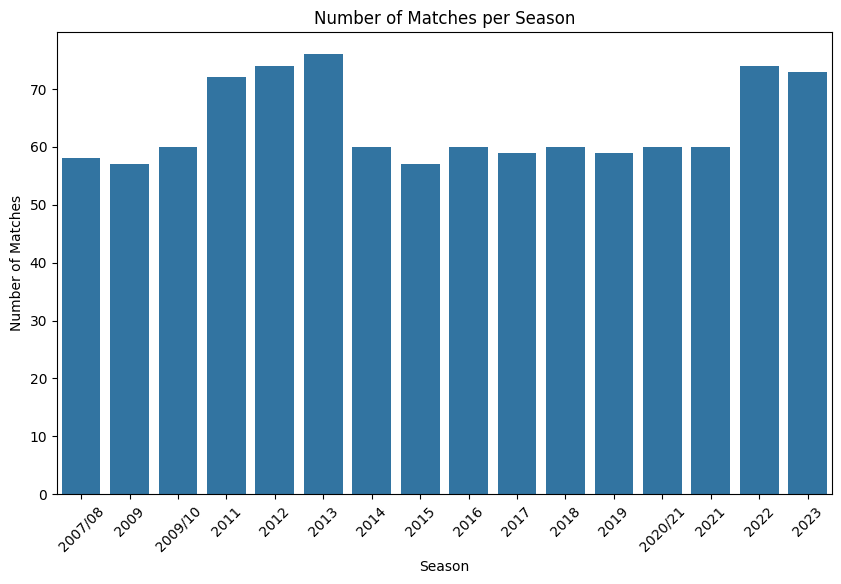

In [ ]:
# Number of Matches per Season
plt.figure(figsize=(10, 6))
sns.countplot(data=ipl_matches, x='season')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


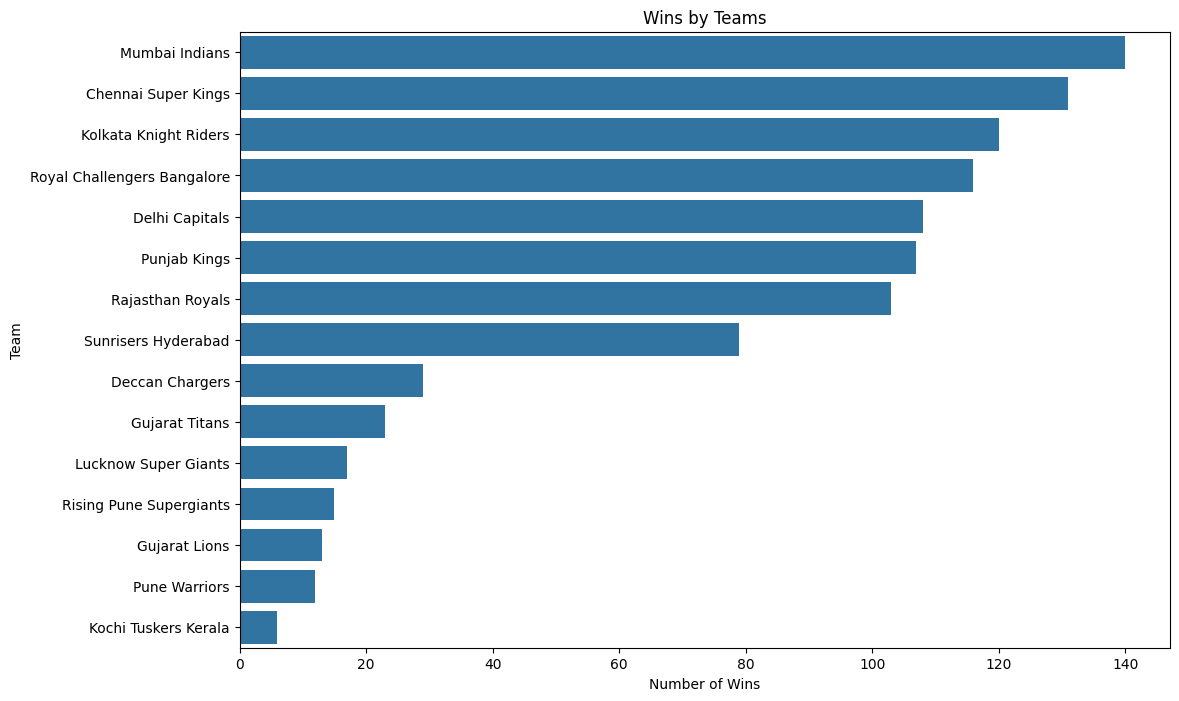

In [ ]:
# Wins by Teams
plt.figure(figsize=(12, 8))
sns.countplot(data=ipl_matches, y='winner', order=ipl_matches['winner'].value_counts().index)
plt.title('Wins by Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

<ipython-input-7-b671972161d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


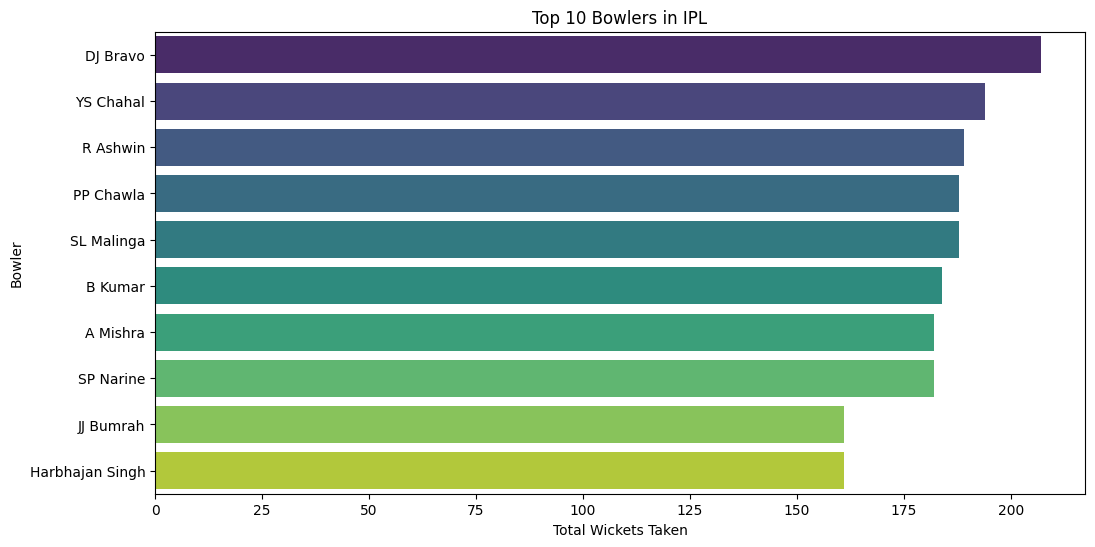

In [ ]:
# Filter data for deliveries that resulted in a wicket
wickets = ipl_delivery[ipl_delivery['is_wicket'] == 1]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()


<ipython-input-5-7e2e2ab6e1e7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


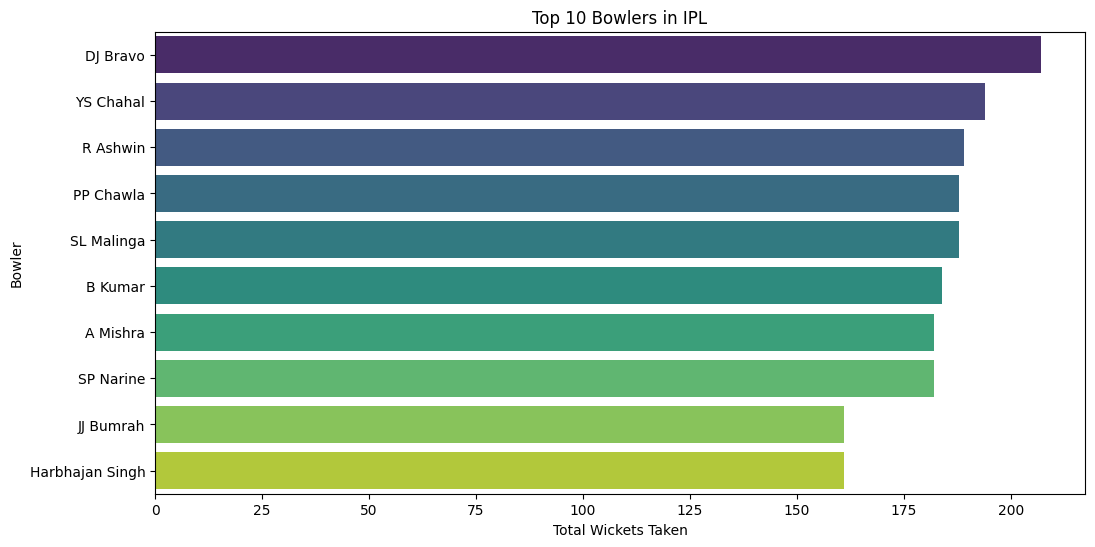

In [ ]:
# Filter data for deliveries that resulted in a wicket
wickets = ipl_delivery[ipl_delivery['is_wicket'] == 1]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)
bowler_wickets
# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()


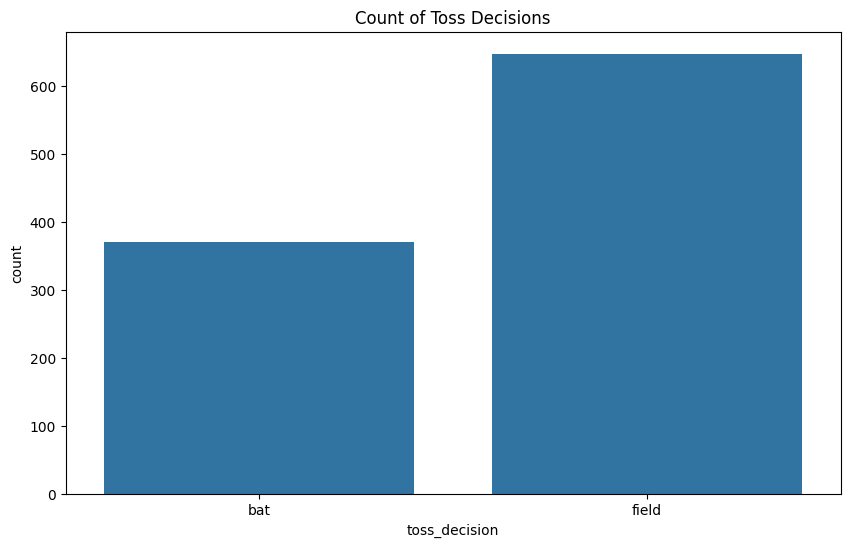

In [ ]:
# Bar chart for toss decisions
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', data=ipl_matches)
plt.title('Count of Toss Decisions')
plt.show()

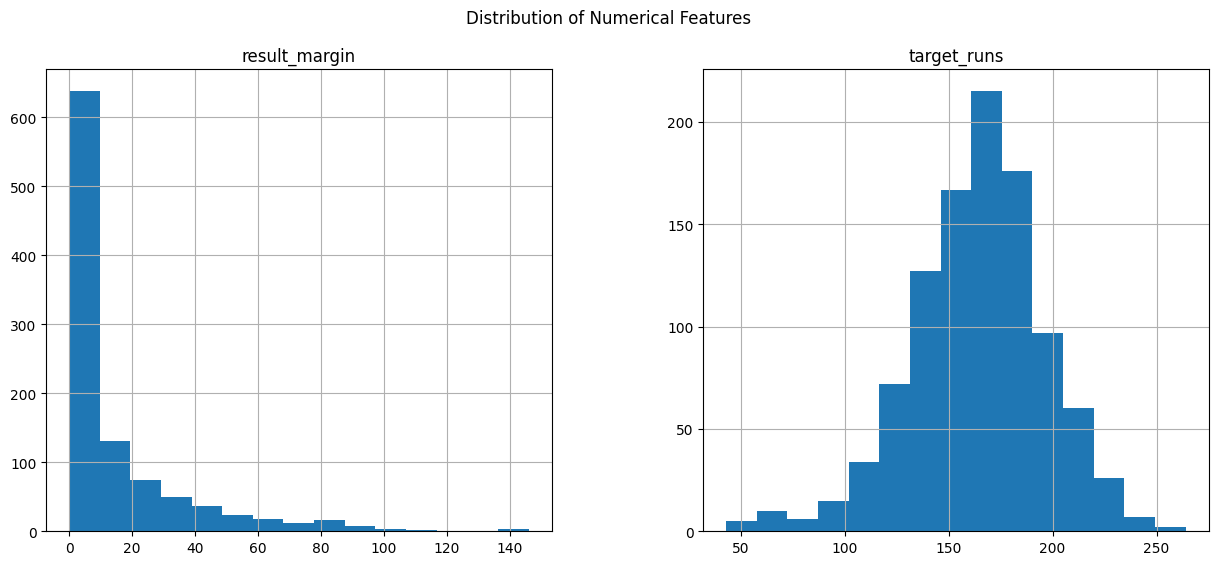

In [ ]:
# Plotting histograms for numerical features
numerical_features = ['result_margin', 'target_runs']
ipl_matches[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

<ipython-input-43-662910d988e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=batsman_runs, palette='viridis')


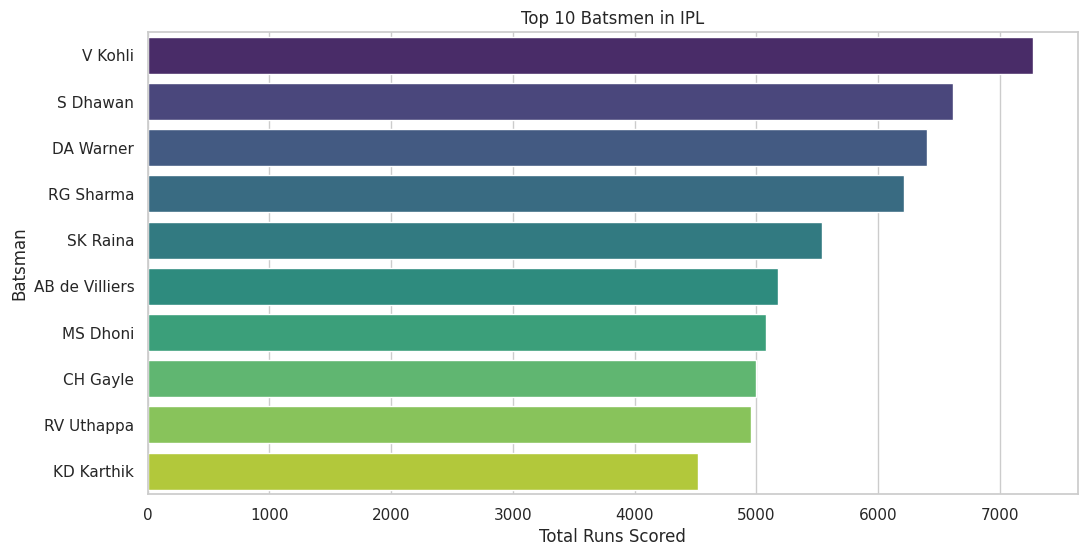

In [ ]:
# Calculate total runs scored by each batsman
batsman_runs = ipl_delivery.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot top 10 batsmen
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=batsman_runs, palette='viridis')
plt.title('Top 10 Batsmen in IPL')
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.show()

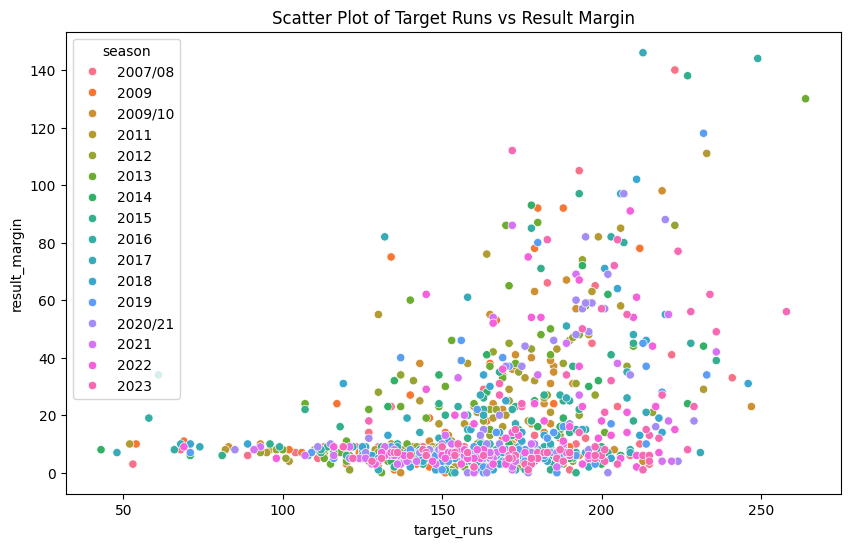

In [ ]:
# Scatter plot to explore the relationship between result_margin and target_runs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ipl_matches, x='target_runs', y='result_margin', hue='season')
plt.title('Scatter Plot of Target Runs vs Result Margin')
plt.show()

<Axes: xlabel='over'>

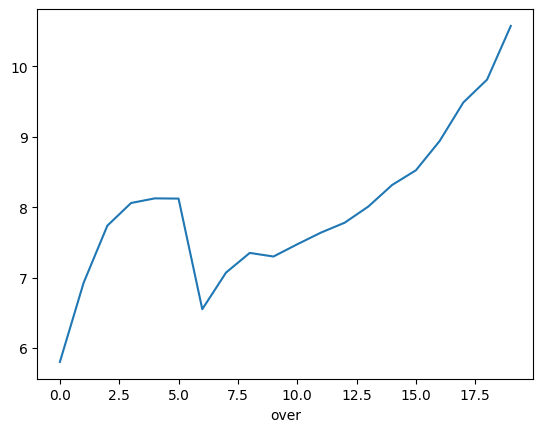

In [ ]:
# Average runs in an over (All seasons combined)
(ipl_delivery.groupby('over')['total_runs'].mean()*6).plot(kind = 'line')

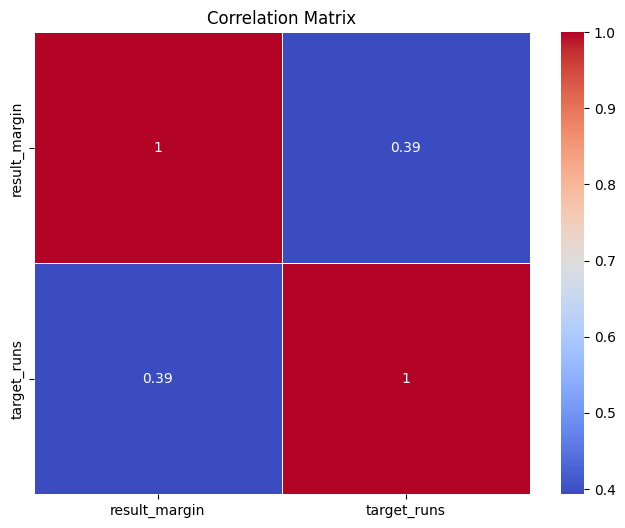

In [ ]:
# Compute the correlation matrix
correlation_matrix = ipl_matches[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


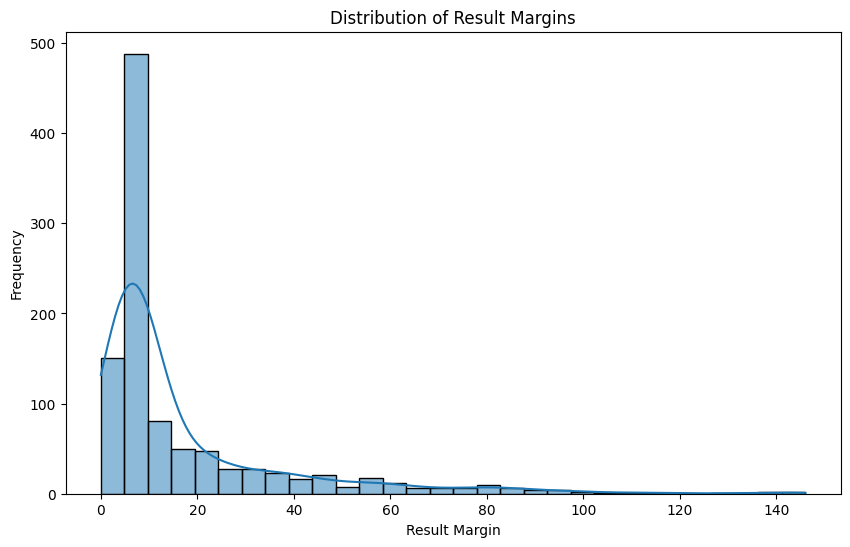

In [ ]:
# Distribution of Result Margins
plt.figure(figsize=(10, 6))
sns.histplot(data=ipl_matches, x='result_margin', bins=30, kde=True)
plt.title('Distribution of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.show()

#**3 Model Building**

**Predicting Match Winner:**

Based on pre-match information
For this task, we'll use the df_ipl_matches dataset. We'll build a classification model to predict the winner of a match using pre-match information.

**Features to Use:**

* Season
* City
* Venue
* Team1
* Team2
* Toss Winner
* Toss Decision
* Match Type

**Target:**

* Winner

**Preprocessing:**
Encode categorical variables
Split data into training and testing sets

In [ ]:
# Select features and target
features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'match_type']
target = 'winner'

# Filter out matches with no result
df_ipl_matches_filtered = ipl_matches[ipl_matches['winner'] != 'No Result']

# Encode categorical variables
le = LabelEncoder()
df_ipl_matches_encoded = df_ipl_matches_filtered.copy()
for col in features + [target]:
    df_ipl_matches_encoded[col] = le.fit_transform(df_ipl_matches_filtered[col])

# Split data into training and testing sets
X = df_ipl_matches_encoded[features]
y = df_ipl_matches_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(819, 8) (205, 8)
(819,) (205,)


Now, let's build and evaluate a simple classification model using Random Forest.

In [ ]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.43
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.72      0.57        25
           1       0.40      1.00      0.57         2
           2       0.25      0.20      0.22         5
           3       0.62      0.31      0.42        16
           4       0.33      0.25      0.29         4
           5       0.50      0.17      0.25         6
           6       0.42      0.25      0.31        20
           7       0.00      0.00      0.00         1
           8       0.44      0.40      0.42        30
           9       0.20      0.33      0.25         3
          10       0.35      0.53      0.42        17
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         5
          13       0.41      0.30      0.35        23
          14       1.00      1.00      1.00         1
          16       0.48      0.55      0.52        29
          17       0.44      0.50      0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5.2 Predicting Runs Scored in an Over**
For this task, we'll use the df_ipl_delivery dataset. We'll build a regression model to predict the total runs scored in an over based on deliveries data.

**Features to Use:**

* Match ID
* Inning
* Batting Team
* Bowling Team
* Over
* Ball
* Batter
* Bowler

**Target:**

Total Runs (runs_in_over)

**Preprocessing:**

* Encode categorical variables
* Aggregate data to get runs scored in each over
* Split data into training and testing sets

In [ ]:
# Aggregate to get total runs scored in each over
df_runs_per_over = ipl_delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team', 'over']).agg({'runs_in_over': 'sum'}).reset_index()

# Select features and target
features = ['match_id', 'inning', 'batting_team', 'bowling_team', 'over']
target = 'runs_in_over'

# Encode categorical variables
df_runs_per_over_encoded = df_runs_per_over.copy()
for col in features:
    if df_runs_per_over_encoded[col].dtype == 'object':
        df_runs_per_over_encoded[col] = le.fit_transform(df_runs_per_over_encoded[col])

# Split data into training and testing sets
X = df_runs_per_over_encoded[features]
y = df_runs_per_over_encoded[target]

X_trainD, X_testD, y_trainD, y_testD = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(X_trainD.shape, X_testD.shape)
print(y_trainD.shape, y_testD.shape)


(31577, 5) (7895, 5)
(31577,) (7895,)


Now, let's build and evaluate a simple regression model using Random Forest.

In [ ]:
# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_trainD, y_trainD)

# Make predictions
y_predD = rf_regressor.predict(X_testD)

# Evaluate the model
mae = mean_absolute_error(y_testD, y_predD)
mse = mean_squared_error(y_testD, y_predD)
rmse = mse ** 0.5

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 33.63
Mean Squared Error: 1911.65
Root Mean Squared Error: 43.72


**Reasoning:**

**1.Random Forest for Classification:** Random Forest is a robust model for classification tasks and works well with categorical features.

**2.Random Forest for Regression:** Similarly, Random Forest is effective for regression tasks and handles non-linear relationships well.

These models should give you a good starting point. You can further tune the hyperparameters, try other algorithms, and perform cross-validation to improve performance.

#**4 Model Evaluation and Hyperparameter Tuning**
To improve the performance of our models, we need to evaluate them thoroughly and tune their hyperparameters. We'll start with the Random Forest model for predicting match winners and then move to the regression model for predicting runs scored in an over.

6.1 Evaluating and Tuning the Classification Model (Match Winner Prediction)
Current Performance:

* Accuracy
* Classification Report

Next Steps:

**Cross-Validation:** Use cross-validation to get a more robust estimate of the model's performance.

**Hyperparameter Tuning:** Use GridSearchCV to find the best hyperparameters for the Random Forest model.

**Cross-Validation:**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.00367321 0.01203293 0.01216114 0.01190778 0.00342032]
Mean Cross-Validation Accuracy: 0.01


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize the RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights_dict)

# Define the refined grid of hyperparameters
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': [4, 5, 6],
    'max_depth': [8, 10, 12]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")


Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'max_depth': 8, 'max_features': 4, 'n_estimators': 1500}
Best Score: 0.47


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize the RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights_dict)

# Define the grid of hyperparameters including additional parameters
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': [4, 5, 6],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", report)


Fitting 10 folds for each of 486 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


**Hyperparameter Tuning**

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [500, 1000],
    'max_features': ['sqrt', 'log2', 5, 10],
    'max_depth': [None, 10, 20, 30, 50]
}

# Set up the grid search
# Use n_jobs=1 to disable parallelism and prevent memory issues
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=1, verbose=2)

# Fit the grid search to the data (X_train and y_train are your training features and labels)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, m

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.06


**Evaluating the Tuned Model**

In [ ]:
# Use the best estimator from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print("Tuned Model Classification Report:\n", report_tuned)


Tuned Model Accuracy: 0.06
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00        31
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**6.2 Evaluating and Tuning the Regression Model (Runs Prediction)
Current Performance:**

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

**Next Steps:**

**Cross-Validation:** Use cross-validation to get a more robust estimate of the model's performance.

**Hyperparameter Tuning:** Use GridSearchCV to find the best hyperparameters for the Random Forest regressor.

**Cross-Validation:**

In [ ]:
# Perform 5-fold cross-validation
cv_scores_reg = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-Validation MAE Scores: {-cv_scores_reg}")
print(f"Mean Cross-Validation MAE: {-cv_scores_reg.mean():.2f}")


Cross-Validation MAE Scores: [37.58654592 34.94910956 37.39657715 38.01015835 39.13053078]
Mean Cross-Validation MAE: 37.41


**Hyperparameter Tuning:**

In [ ]:
# Define the parameter grid for the regressor
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object for the regressor
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_reg, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_reg.fit(X_train, y_train)


# Print the best parameters and best score
print(f"Best Parameters (Regressor): {grid_search_reg.best_params_}")
print(f"Best Score (Regressor): {-grid_search_reg.best_score_:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters (Regressor): {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (Regressor): 33.56


**Evaluating the Tuned Regressor**

In [ ]:
# Use the best estimator from the grid search
best_rf_regressor = grid_search_reg.best_estimator_

# Make predictions
y_pred_reg_tuned = best_rf_regressor.predict(X_test)

# Evaluate the model
mae_tuned = mean_absolute_error(y_test, y_pred_reg_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_reg_tuned)
rmse_tuned = mse_tuned ** 0.5

print(f"Tuned Model MAE: {mae_tuned:.2f}")
print(f"Tuned Model MSE: {mse_tuned:.2f}")
print(f"Tuned Model RMSE: {rmse_tuned:.2f}")


Tuned Model MAE: 33.13
Tuned Model MSE: 1863.11
Tuned Model RMSE: 43.16


**Reasoning**:
* Cross-Validation: Provides a more robust estimate of model performance by averaging results from multiple folds.
* GridSearchCV: Helps find the best combination of hyperparameters to optimize model performance.
* Evaluation: Post-tuning evaluation helps compare the tuned model with the initial model to verify improvements.

These steps will enhance your models and provide more reliable predictions. If you need further refinements or specific analyses, let me know how you'd like to proceed!

# **5 Model Interpretation and Feature Importance**
After tuning the models, it is essential to interpret the results and understand the feature importance. This step helps in identifying the key factors that influence the predictions and provides insights into the data.

**7.1 Feature Importance for Classification Model**

For the Random Forest classification model, we can use the feature importance scores to understand which features contribute most to predicting the match winner.

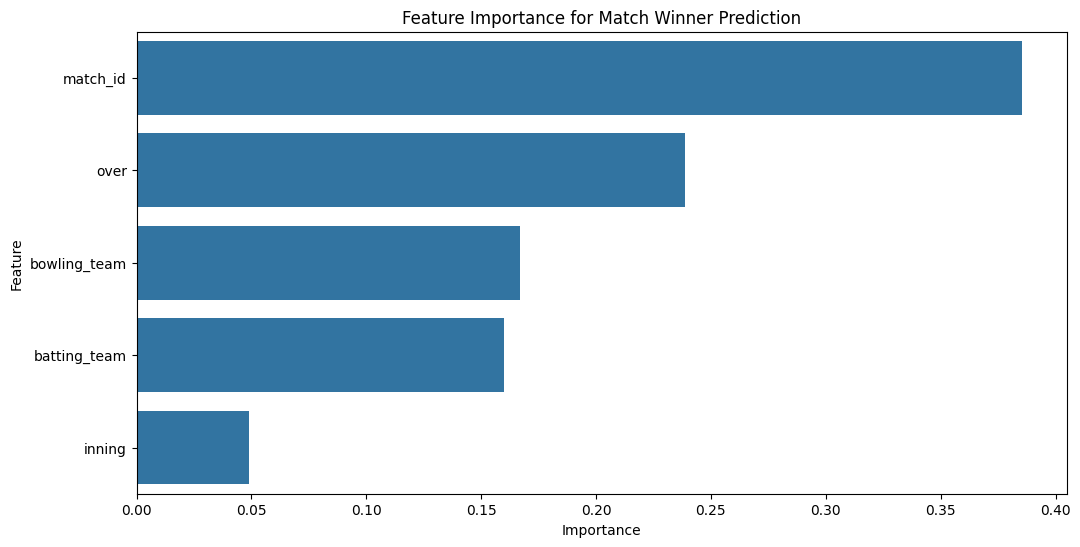

In [ ]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Match Winner Prediction')
plt.show()


**7.2 Feature Importance for Regression Model**

Similarly, for the Random Forest regression model, we can examine the feature importance scores to identify the key factors that influence the total runs scored in an over.

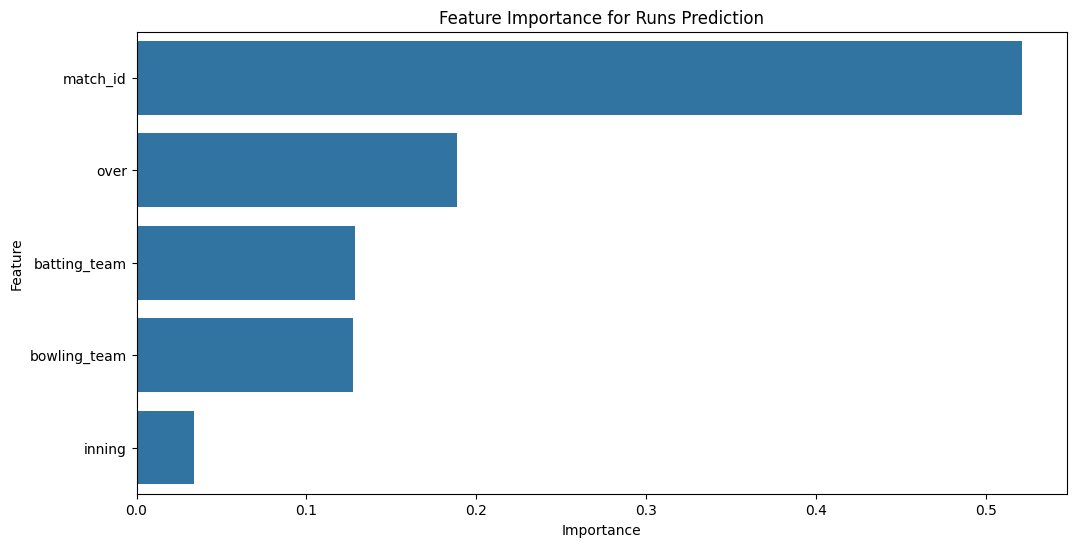

In [ ]:
# Get feature importances from the best regressor model
feature_importances_reg = best_rf_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_reg_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_reg
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_reg_df)
plt.title('Feature Importance for Runs Prediction')
plt.show()


#**6 Deployment**
Once the models are trained, tuned, and evaluated, the next step is to deploy them for making predictions on new data. This involves saving the models and creating functions to load and use them for predictions.

**8.1 Saving the Models**

We can use joblib to save the trained models.

In [ ]:
import joblib

# Save the best classification model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Save the best regression model
joblib.dump(best_rf_regressor, 'best_rf_regressor.pkl')


['best_rf_regressor.pkl']

**8.2 Loading and Using the Models**

To make predictions using the saved models, we can load them and create prediction functions

In [ ]:
# Load the models
loaded_rf_model = joblib.load('best_rf_model.pkl')
loaded_rf_regressor = joblib.load('best_rf_regressor.pkl')

# Function to predict match winner
def predict_match_winner(match_details):
    match_details_encoded = match_details.copy()
    for col in features:
        match_details_encoded[col] = le.transform([match_details[col]])[0]
    match_details_df = pd.DataFrame([match_details_encoded])
    prediction = loaded_rf_model.predict(match_details_df)
    return le.inverse_transform(prediction)[0]

# Function to predict runs in an over
def predict_runs_in_over(over_details):
    over_details_encoded = over_details.copy()
    for col in features:
        if col != 'over':
            over_details_encoded[col] = le.transform([over_details[col]])[0]
    over_details_df = pd.DataFrame([over_details_encoded])
    prediction = loaded_rf_regressor.predict(over_details_df)
    return prediction[0]

# Example usage
match_details = {
    'season': '2020',
    'city': 'Mumbai',
    'venue': 'Wankhede Stadium',
    'team1': 'Mumbai Indians',
    'team2': 'Chennai Super Kings',
    'toss_winner': 'Mumbai Indians',
    'toss_decision': 'bat',
    'match_type': 'League'
}

over_details = {
    'match_id': 1,
    'inning': 1,
    'batting_team': 'Mumbai Indians',
    'bowling_team': 'Chennai Super Kings',
    'over': 5
}

print(f"Predicted Match Winner: {predict_match_winner(match_details)}")
print(f"Predicted Runs in Over: {predict_runs_in_over(over_details):.2f}")


Predicted Match Winner: Error: Input data does not contain any of the required features.


ValueError: y contains previously unseen labels: 1

**Reasoning:**

**Feature Importance:** Understanding which features are most important helps in interpreting the model and provides insights into the data.

**Model Deployment:** Saving and loading models allows you to use them for making predictions on new data, enabling practical application of your work.

**Prediction Functions:** Creating functions for prediction makes it easy to use the models in different scenarios and integrates them into applications.

These steps complete the process of building, tuning, interpreting, and deploying machine learning models using IPL data. If you need further refinement or additional analyses, please let me know!

#ipl